Loading and Visualizing Data ...


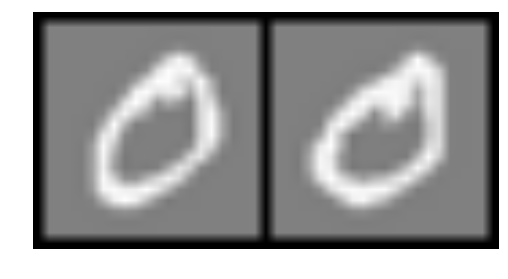

Training 1 out of 10 categories...
Training 2 out of 10 categories...
Training 3 out of 10 categories...
Training 4 out of 10 categories...
Training 5 out of 10 categories...
Training 6 out of 10 categories...
Training 7 out of 10 categories...
Training 8 out of 10 categories...
Training 9 out of 10 categories...
Training 10 out of 10 categories...
[[  9.99972541e-01   1.70016371e-17   1.31425358e-04   7.67556923e-05
    1.19868002e-09   2.52600362e-04   1.07304482e-06   3.25518294e-09
    2.98958066e-04   4.05722604e-03]
 [  9.99983644e-01   2.58238781e-14   2.34916972e-06   8.64187981e-05
    4.31537993e-10   8.56525372e-03   1.61715266e-10   4.05491846e-09
    1.96498333e-06   3.72640439e-05]]


In [333]:
import numpy as np
import scipy.io as sio
import math
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.special import expit

def displayData(X, example_width=None):
    plt.close()

    # creates new figure 
    plt.figure()

    # turns 1D X array into 2D
    if X.ndim == 1:
        X = np.reshape(X, (-1,X.shape[0]))

    # Set example_width automatically if not passed in
    if not example_width or not 'example_width' in locals():
        example_width = int(round(math.sqrt(X.shape[1])))

    # Gray Image
    plt.set_cmap("gray")

    # Compute rows, cols
    m, n = X.shape
    example_height = n / example_width

    # Compute number of items to display
    display_rows = int(math.floor(math.sqrt(m)))
    display_cols = int(math.ceil(m / display_rows))

    # Between images padding
    pad = 1

    # Setup blank display
    display_array = -np.ones((pad + display_rows * (example_height + pad),  pad + display_cols * (example_width + pad)))

    # Copy each example into a patch on the display array
    curr_ex = 1
    for j in xrange(1,display_rows+1):
        for i in xrange (1,display_cols+1):
            if curr_ex > m:
                break

            # Copy the patch

            # Get the max value of the patch to normalize all examples
            max_val = max(abs(X[curr_ex-1, :]))
            rows = pad + (j - 1) * (example_height + pad) + np.array(range(example_height))
            cols = pad + (i - 1) * (example_width  + pad) + np.array(range(example_width ))

            display_array[rows[0]:rows[-1]+1 , cols[0]:cols[-1]+1] = np.reshape(X[curr_ex-1, :], (example_height, example_width), order="F") / max_val
            curr_ex += 1

        if curr_ex > m:
            break

    # Display Image
    h = plt.imshow(display_array, vmin=-1, vmax=1)

    # Do not show axis
    plt.axis('off')

    plt.show(block=False)

    return h, display_array

def sigmoid(z):
    return expit(z)

def lrCostFunction(theta, X, y, lambda_reg, return_grad=False):
    m = len(y)
    z = sigmoid(X.dot(theta))
    
    one = y * np.transpose(np.log( sigmoid( np.dot(X,theta) ) ))
    two = (1-y) * np.transpose(np.log( 1 - sigmoid( np.dot(X,theta) ) ))
    reg = ( float(lambda_reg) / (2*m)) * np.power(theta[1:theta.shape[0]],2).sum()
    J = -(1./m)*(one+two).sum() + reg
    
    grad = (1./m) * (np.dot((z.T - y), X).T) + (float(lambda_reg / m)) * theta
    
    grad_without_reg = (1/m) * (np.dot((z.T - y), X).T)
    grad[0] = grad_without_reg[0]
    

    if return_grad:
        return J, grad.flatten()
    else:
        return J
    
def oneVsAll(X, y, iters, lambda_reg):
    # Some useful variables
    m, n = X.shape

    # You need to return the following variables correctly 
    all_theta = np.zeros((num_labels, n + 1))

    # Add ones to the X data matrix
    X = np.column_stack((np.ones((m,1)), X))

    for c in np.arange(num_labels):

        # initial theta for c/class
        initial_theta = np.zeros((n + 1, 1))

        print("Training {:d} out of {:d} categories...".format(c+1, num_labels))

        # functions WITH gradient/jac parameter
        # from https://github.com/tansaku/py-coursera/issues/9#issuecomment-8801160
        myargs = (X, (y%10==c).astype(int), lambda_reg, True)
        theta = minimize(lrCostFunction, x0=initial_theta, args=myargs, options={'disp': False, 'maxiter':13}, method="Newton-CG", jac=True)

        # assign row of all_theta corresponding to current c/class
        all_theta[c,:] = theta["x"]

    return all_theta

def predictOneVsAll(all_theta, X):
    m = X.shape[0]
    num_labels = all_theta.shape[0]
    # You need to return the following variables correctly
    p = np.zeros((m, 1))
    # Add ones to the X data matrix
    X = np.column_stack((np.ones((m,1)), X))
    
    p = np.argmax(sigmoid( np.dot(X,all_theta.T) ), axis=1)
    print(sigmoid( np.dot(X,all_theta.T) ))
    return p

# Load label training data to fit into model
print('Loading and Visualizing Data ...')

mat = sio.loadmat('ex3data1.mat')

X = mat["X"]
y = mat["y"]

m = X.shape[0]

# crucial step in getting good performance!
# changes the dimension from (m,1) to (m,)
# otherwise the minimization isn't very effective...
y=y.flatten() 

# Randomly select 100 data points to display
# rand_indices = np.random.permutation(m)
sel = X[:2,:]

displayData(sel)

lambda_reg = 0.1
all_theta = oneVsAll(X, y, num_labels, lambda_reg)

pred = predictOneVsAll(all_theta, sel)
